In [4]:
import h5py
#file_path = "/home/stefan/STORAGE/Projects2023/ev0000447288.h5"
#file_path = "/Users/username/STORAGE/Project2023"
file_path = 'ev0000447288.h5'

In [5]:
# Open the file
f = h5py.File(file_path, 'r')
f

<HDF5 file "ev0000447288.h5" (mode r)>

In [6]:
# List all the attributes for the file
list(f.attrs.keys())

['ele', 'lat', 'lon', 'mag', 'time']

In [7]:
# List of the stations
list(f.keys())

['IWZH',
 'KANH',
 'KASH',
 'KJNH',
 'KJSH',
 'KMIH',
 'KRMH',
 'KZMH',
 'TROH',
 'YMDH']

In [8]:
# Shape of the data for a station
dset = f['IWZH']
dset.shape

(3, 270000000)

In [9]:
dset.shape[1]/(100*60*60*24)

31.25

In [7]:
# List of attributes for the station
list(dset.attrs.keys())

['dist_m', 'ele', 'lat', 'lon']

In [23]:
# Access the distance in meters of the station from the event
print(dset.attrs['dist_m'],
dset.attrs['ele'],
dset.attrs['lat'],
dset.attrs['lon'])

0132104 209 39.8020 141.6520


In [24]:
# Find the distance for all the stations
for k in f.keys():
    print(k,f[k].attrs['dist_m'])

IWZH 0132104
KANH 0139004
KASH 0137723
KJNH 0128040
KJSH 0128684
KMIH 0135110
KRMH 0145234
KZMH 0140731
TROH 0110875
YMDH 0116754


In [13]:
# Extract a portion of the data from numerous stations

import numpy as np

# List of stations to consider
stations_list = ['IWZH', 'KJNH', 'KZMH','YMDH']

# Start and end index values for the portion of data to extract
# 24*3600*100 is 24 hours of data at 100 Hzone day of data.
# this example outputs firt hour of second day:
start = 27*3600*100
end = 28*3600*100

# Number of channels
num_channels = 3

# Allocate the space to save the extracted data
data = np.empty((len(stations_list),num_channels,end-start,))

for i in range(len(stations_list)):
    data[i,0:num_channels,:] = f[stations_list[i]][0:num_channels,start:end]
    
print(data.shape)

(4, 3, 360000)


In [15]:
# Save the extracted data to file
np.save('data.npy', data)

In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


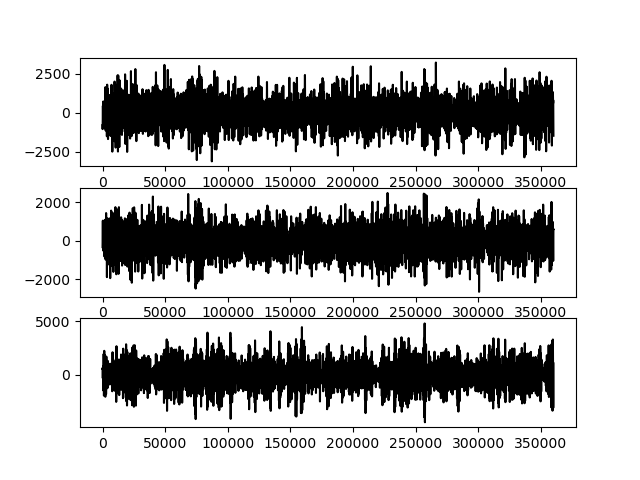

In [14]:
fig,ax=plt.subplots(3)
ax[0].plot(data[0,0,:],'k-')
ax[1].plot(data[0,1,:],'k-')
ax[2].plot(data[0,2,:],'k-')